In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_csv("./data/dataset.csv")

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df.iloc[:, 1:].dropna(), test_size=0.2)

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

predictor = TabularPredictor(
    label="passorfail", eval_metric="f1_macro", path="./Models"
).fit(train, presets="best")

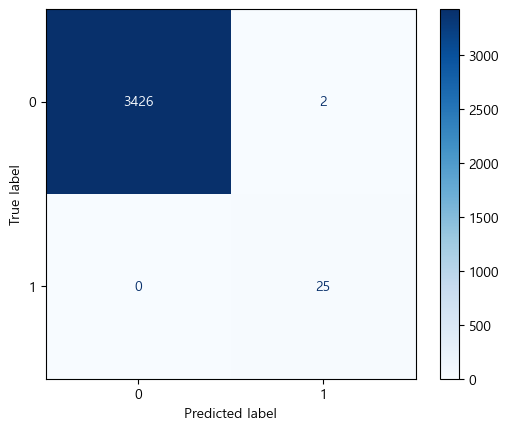

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = predictor.predict(test.iloc[:, :-1])

cm = confusion_matrix(test.iloc[:, -1], y_pred)

# 혼돈 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
lgbm = LGBMClassifier()

rfc.fit(train.iloc[:, :-1], train.iloc[:, -1])
etc.fit(train.iloc[:, :-1], train.iloc[:, -1])
xgb.fit(train.iloc[:, :-1], train.iloc[:, -1])
cat.fit(train.iloc[:, :-1], train.iloc[:, -1])
lgbm.fit(train.iloc[:, :-1], train.iloc[:, -1])

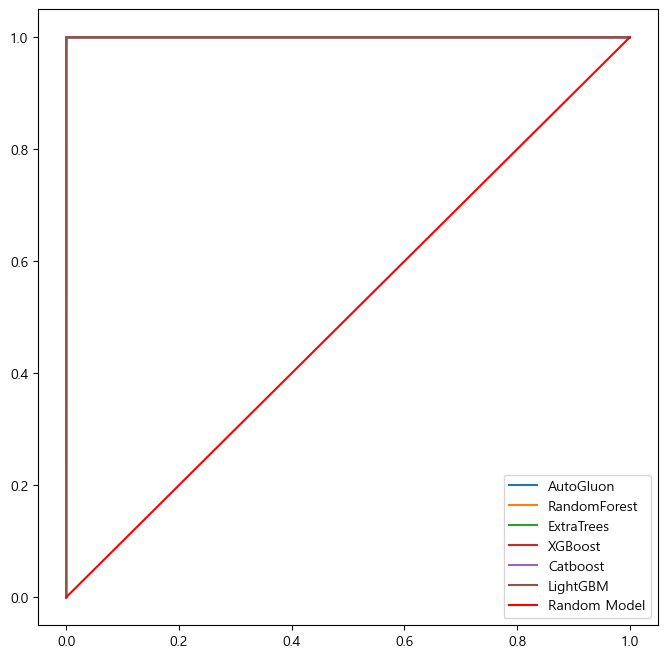

In [15]:
from sklearn.metrics import roc_curve

score1 = predictor.predict_proba(train.iloc[:, :-1]).iloc[:, 1]
score2 = rfc.predict_proba(train.iloc[:, :-1])[:, 1]
score3 = etc.predict_proba(train.iloc[:, :-1])[:, 1]
score4 = xgb.predict_proba(train.iloc[:, :-1])[:, 1]
score5 = cat.predict_proba(train.iloc[:, :-1])[:, 1]
score6 = lgbm.predict_proba(train.iloc[:, :-1])[:, 1]


## False Positive Rate, True Positive Rate, 절단값 리턴
fpr1, tpr1, cut1 = roc_curve(train.iloc[:, -1], score1)
fpr2, tpr2, cut2 = roc_curve(train.iloc[:, -1], score2)
fpr3, tpr3, cut3 = roc_curve(train.iloc[:, -1], score3)
fpr4, tpr4, cut4 = roc_curve(train.iloc[:, -1], score4)
fpr5, tpr5, cut5 = roc_curve(train.iloc[:, -1], score5)
fpr6, tpr6, cut6 = roc_curve(train.iloc[:, -1], score6)

## ROC 곡선 그리기
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor("white")
ax = fig.add_subplot()
ax.plot(fpr1, tpr1, label="AutoGluon")
ax.plot(fpr2, tpr2, label="RandomForest")
ax.plot(fpr3, tpr3, label="ExtraTrees")
ax.plot(fpr4, tpr4, label="XGBoost")
ax.plot(fpr5, tpr5, label="Catboost")
ax.plot(fpr6, tpr6, label="LightGBM")
ax.plot([0, 1], [0, 1], color="red", label="Random Model")
ax.legend()
plt.show()

In [20]:
predictor.feature_importance(train)

Computing feature importance via permutation shuffling for 18 features using 5000 rows with 5 shuffle sets...
	1026.89s	= Expected runtime (205.38s per shuffle set)
	686.16s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
EX1.MD_PV,0.463756,0.026445,0.000001,5,0.518207,0.409306
EX1.MELT_P_PV,0.038641,0.028176,0.018708,5,0.096655,-0.019373
EX1.Z1_PV,0.021422,0.011535,0.007116,5,0.045173,-0.002330
EX1.H2O_PV,0.017881,0.014669,0.026337,5,0.048084,-0.012322
EX1.A1_PV,0.007319,0.008252,0.059176,5,0.024309,-0.009671
EX1.A2_PV,0.003299,0.004521,0.089050,5,0.012608,-0.006010
EX1.H1_PV,0.002655,0.011458,0.315860,5,0.026246,-0.020936
EX1.H4_PV,0.002333,0.005217,0.186950,5,0.013076,-0.008409
EX1.Z2_PV,0.001814,0.004056,0.186950,5,0.010166,-0.006538
EX1.Z4_PV,0.001502,0.003358,0.186950,5,0.008417,-0.005413
